## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 100);

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: 
- As someone who gives people handmade gifts, is he/she left-handed?
- Does an association exist between keeping personal journals and being left-handed?
- As the likelihood of a person decorating his/her things increases, does it increase the chance that he/she is left handed?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [2]:
df = pd.read_table('./data.csv')

In [3]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,91,232,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,17,247,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,11,6774,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,14,1072,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,10,226,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:
- We need to consider if sexual orientation or gender identity is a data we need. 
- We can collect this data anonymously.
- The format of the question can be changed. Instead of choosing between Male, Female and Others, it can be a Fill-in-the-blank question.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [4]:
df.info()
# no null values, all are integer type except for 'country' which is string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [5]:
df.isnull().sum()
# confirm no null values

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

In [6]:
df_num = df.drop(columns=['country', 'fromgoogle', 'introelapse', 'testelapse']) # drop columns
df_num = df_num.drop(columns=['engnat', 'age', 'education', 'gender', 'orientation', 'race', 'religion'])
df_num.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,hand
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,3
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,1
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,2
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,2
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,3


c:\Users\muzaf\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


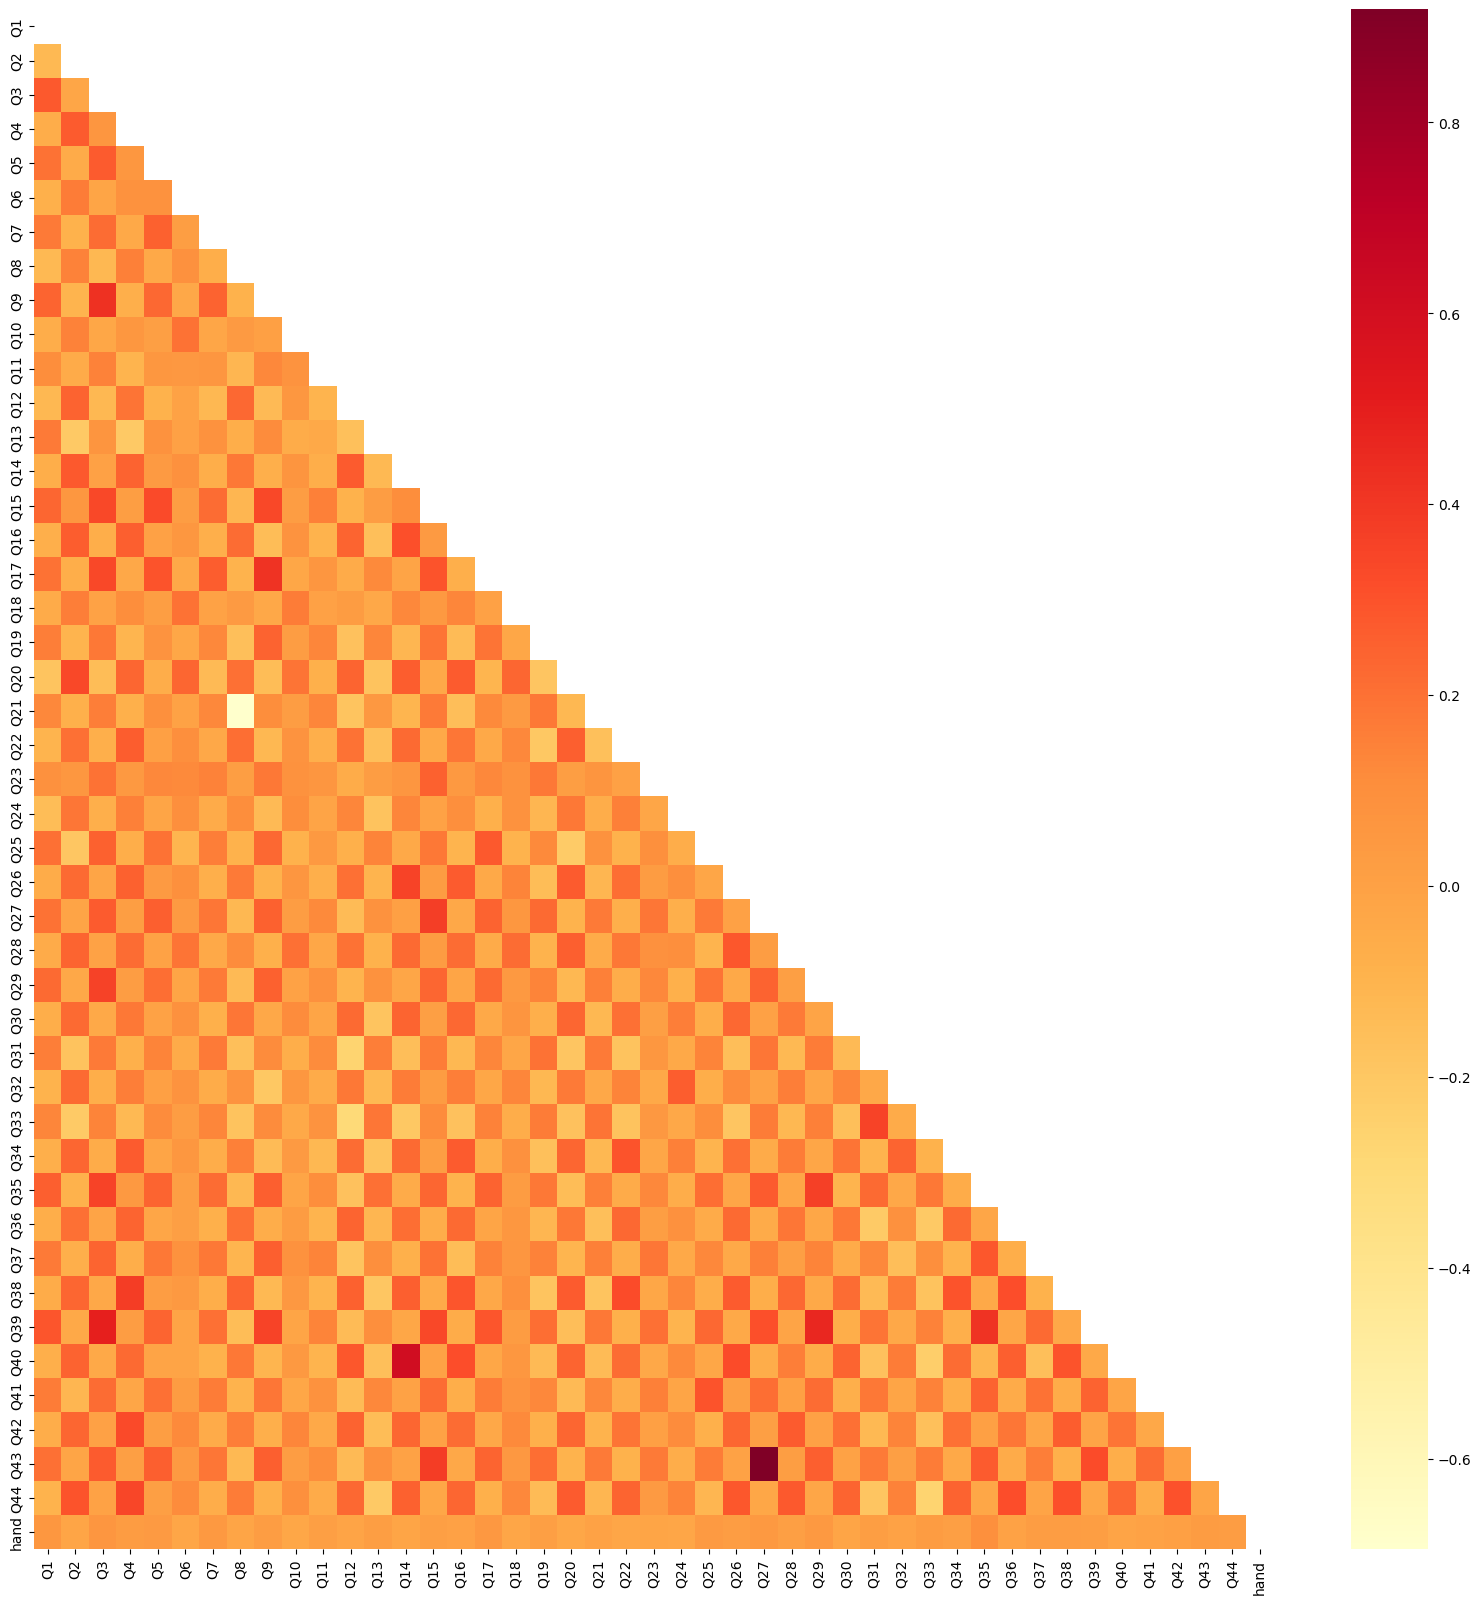

In [7]:
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(df_num.corr()))
heat = sns.heatmap(df_num.corr(), fmt=".1f", cmap="YlOrRd", annot=True, mask=mask)
plt.show();

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: This would be a classification problem. The context of left-handedness is discrete.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: We standardize our variables because they might not be on the same scale. For example, if we have the data for resale price of a HDB flat, we might need to scale it because the values are large, in hundreds of thousands (eg. $623,792). One dollar change in the resale price might not be significant.

For k-nearest neighbors, we are trying to see which observations are close to one another. If we have two variables that are on very different scales, then one variable will make observations look close to one another.

### 7. Give an example of when we might not standardize our variables.

Answer: When the variables are already on the same scale.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: No, we should not standardize our predictor variables. The input values are ranging from around 1 to 7 for all questions except the age question (which is likely to be ranging from 1 to 100). This is also considered a small value.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: We can create a new column called 'left-handed' and the values 1 (means left-handed) and 0 (means not left-handed).

In [8]:
df['hand'].unique()
# people who put 0 are not answering the question properly
# 1 is right, 2 is left, and 3 is both

array([3, 1, 2, 0], dtype=int64)

In [9]:
df['hand'].value_counts()
# we can drop the 11 rows that have '0' as answer for 'hand'

hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [10]:
# drop the 11 rows
df = df.drop(df[df['hand'] == 0].index)
df = df.reset_index(drop='index')
df.tail()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
4168,3,5,4,5,2,4,2,2,2,5,3,1,1,2,2,4,1,4,1,5,4,5,4,2,1,4,1,5,3,3,2,1,2,5,2,3,4,3,4,2,3,4,2,5,6,366,US,1,1,18,2,1,1,6,2,1
4169,1,5,1,5,1,4,2,4,1,4,1,5,1,3,1,5,2,1,1,5,1,4,2,0,1,4,1,4,1,2,2,1,1,1,1,5,2,4,1,5,1,1,1,4,16,191,US,1,1,18,2,2,1,3,2,1
4170,3,2,2,4,5,4,5,2,2,5,5,1,3,2,5,2,1,5,5,1,4,2,5,3,3,1,2,1,1,3,5,1,1,2,4,1,5,1,2,2,5,1,2,1,8,548,PL,2,2,22,2,1,1,6,1,1
4171,1,3,4,5,1,3,3,1,1,3,2,1,4,4,5,3,1,3,5,3,5,5,5,2,1,5,3,3,5,1,4,1,5,5,1,1,1,1,1,5,5,1,3,3,39,255,US,2,1,16,1,2,5,1,1,1
4172,2,5,3,3,5,3,4,3,1,5,5,2,3,5,4,1,1,1,2,4,4,5,5,5,4,5,4,5,4,3,4,5,1,4,5,1,5,1,4,5,1,5,4,4,36,230,NZ,2,1,22,3,2,4,6,1,1


In [11]:
# create column y (left-handed)
df['y'] = [1 if value == 2 else 0 for value in df['hand']]
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand,y
0,4,1,5,1,5,1,5,1,4,1,1,1,5,5,5,1,5,1,5,1,5,1,1,1,5,5,5,1,5,1,1,1,1,5,5,1,1,1,5,5,5,1,5,1,91,232,US,2,1,22,3,1,1,3,2,3,0
1,1,5,1,4,2,5,5,4,1,5,2,5,3,4,1,4,1,1,1,5,2,4,4,4,1,2,1,2,1,3,1,5,2,4,4,4,4,4,1,3,1,4,4,5,17,247,CA,2,1,14,1,2,2,6,1,1,0
2,1,2,1,1,5,4,3,2,1,4,4,5,4,3,4,1,2,3,1,3,3,3,4,5,3,2,2,2,1,4,3,3,4,4,2,2,4,2,1,4,2,2,2,2,11,6774,NL,2,2,30,4,1,1,1,1,2,1
3,1,4,1,5,1,4,5,4,3,5,1,3,2,3,1,5,2,2,5,5,2,3,2,2,1,4,1,1,1,3,4,1,3,5,5,1,3,4,1,2,1,1,1,3,14,1072,US,2,1,18,2,2,5,3,2,2,1
4,5,1,5,1,5,1,5,1,3,1,1,1,5,5,5,1,5,1,5,2,5,1,5,1,5,5,5,1,5,1,5,1,5,5,5,1,1,1,5,5,5,1,5,1,10,226,US,2,1,22,3,1,1,3,2,3,0


### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: Having an even number of categories may lead us to having ties when predicting a discrete output. For example, maybe two nearest neighbors are not left-handed and two nearest neighbors are left-handed. Any prediction in this case would be arbitrary, because it's equally likely (based on the data) for that individual to be left- or not left-handed. It is almost always a good option to pick a value for k that is not divisible by the number of categories.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [12]:
X = df.drop(columns=['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand', 'y'])

y = df['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [16]:
k3 = KNeighborsClassifier(n_neighbors = 3)
k3.fit(X_train, y_train)

k5 = KNeighborsClassifier(n_neighbors = 5)
k5.fit(X_train, y_train)

k15 = KNeighborsClassifier(n_neighbors = 15)
k15.fit(X_train, y_train)

k25 = KNeighborsClassifier(n_neighbors = 25)
k25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: Regularization is applied by default. penalty: l2 (ridge) is the default penalty. 

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: No we should not standardize our features because they are already on the same scale.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [17]:
# use liblinear as our solver because we have a small dataset
# and it is suitable for one-vs-rest systems
# C = 1/alpha
lasso_1 = LogisticRegression(penalty = 'l1', C = 1.0, solver = 'liblinear')
lasso_1.fit(X_train, y_train)

lasso_10 = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'liblinear')
lasso_10.fit(X_train, y_train)

ridge_1 = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'liblinear')
ridge_1.fit(X_train, y_train)

ridge_10 = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'liblinear')
ridge_10.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: No, I dont think so. The questions are very general and they dont seem to have any sort of relationship with being a left-hander.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [19]:
print("For k = 3 train: " + str(k3.score(X_train, y_train)))
print("For k = 3 test: " + str(k3.score(X_test, y_test)))

print("For k = 5 train: " + str(k5.score(X_train, y_train)))
print("For k = 5 test: " + str(k5.score(X_test, y_test)))

print("For k = 15 train: " + str(k15.score(X_train, y_train)))
print("For k = 15 test: " + str(k15.score(X_test, y_test)))

print("For k = 25 train: " + str(k25.score(X_train, y_train)))
print("For k = 25 test: " + str(k25.score(X_test, y_test)))

print("For LASSO train, alpha = 1: " + str(lasso_1.score(X_train, y_train)))
print("For LASSO test, alpha = 1: " + str(lasso_1.score(X_test, y_test)))

print("For LASSO train, alpha = 10: " + str(lasso_10.score(X_train, y_train)))
print("For LASSO test, alpha = 10: " + str(lasso_10.score(X_test, y_test)))

print("For Ridge train, alpha = 1: " + str(ridge_1.score(X_train, y_train)))
print("For Ridge test, alpha = 1: " + str(ridge_1.score(X_test, y_test)))

print("For Ridge train, alpha = 10: " + str(ridge_10.score(X_train, y_train)))
print("For Ridge test, alpha = 10: " + str(ridge_10.score(X_test, y_test)))

For k = 3 train: 0.9034835410674337
For k = 3 test: 0.8448275862068966
For k = 5 train: 0.8938958133589006
For k = 5 test: 0.8745210727969349
For k = 15 train: 0.8916586768935763
For k = 15 test: 0.8917624521072797
For k = 25 train: 0.8916586768935763
For k = 25 test: 0.8917624521072797
For LASSO train, alpha = 1: 0.891978267817194
For LASSO test, alpha = 1: 0.8917624521072797
For LASSO train, alpha = 10: 0.891978267817194
For LASSO test, alpha = 10: 0.8917624521072797
For Ridge train, alpha = 1: 0.891978267817194
For Ridge test, alpha = 1: 0.8917624521072797
For Ridge train, alpha = 10: 0.891978267817194
For Ridge test, alpha = 10: 0.8917624521072797


Answer:
|        Model        |    Value of k   | Penalty |   Value of $\alpha$   | Training Accuracy | Testing Accuracy |
|:-------------------:|:--------------:|:-------:|:----------:|:-----------------:|:----------------:|
|         knn         |  k = 3 |    NA   |     NA     |       0.9035      |      0.8448      |
|         knn         |  k = 5 |    NA   |     NA     |       0.8939      |      0.8745      |
|         knn         | k = 15 |    NA   |     NA     |       0.8917      |      0.8918      |
|         knn         | k = 25 |    NA   |     NA     |       0.8917      |      0.8918      |
| logistic regression |   NA   |  LASSO  |  $\alpha = 1$ |       0.8920      |      0.8918      |
| logistic regression |   NA   |  LASSO  | $\alpha = 10$ |       0.8920      |      0.8918      |
| logistic regression |   NA   |  Ridge  |  $\alpha = 1$ |       0.8920      |      0.8918      |
| logistic regression |   NA   |  Ridge  | $\alpha = 10$ |       0.8920      |      0.8918      |

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: Overfitting occurs when our training score is better than our testing score. In the table above, for k=3 and k=5, there is overfitting.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As k increases, it has less variance, which means that it has more bias.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:
- Increase the value of k
- Use logistic regression instead of KNN
- Drop columns to reduce the number of predictors

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: All of the logistic regression model are slightly overfitted. Train accuracy values are slightly larger than test accuracy values. However, the train and test accuracy are very very close.

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: C = 1 / $\alpha$. 

As C increases, $\alpha$ decreases. This means that regularization decreases. Thus, bias decreases and variance increases.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: Changing C does not have any effect on the accuracy scores.

Our X variables are not good predictors of Y. They do not have any sort of relationship.

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:
- Increase the value of $\alpha$
- Collect data from more people
- Drop columns to reduce the number of predictors

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: I would rather use logistic regression. We can find the coefficients that tell us the impact of a one-unit change in psychological factors on whether or not people are left-handed. k-nearest neighbors does not provide us with a similar way to understand how individual features affect left-handedness.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

Answer:

In [20]:
lasso_1.coef_

array([[-0.03275496,  0.01041628,  0.04576496, -0.08459953,  0.05018722,
        -0.06014715,  0.00366168, -0.17190815, -0.04256786,  0.01778572,
         0.01103646,  0.03573223, -0.02724838,  0.02713956, -0.01898134,
         0.02585306,  0.02041179, -0.02088842, -0.04173176, -0.05220266,
        -0.10304767, -0.07187627, -0.03091906, -0.02201166, -0.00625822,
         0.13836526,  0.06815178,  0.01813256,  0.03431385,  0.02976174,
         0.00954016, -0.03735587,  0.00121673, -0.05012883,  0.02693491,
        -0.02413509, -0.04525651,  0.08802554, -0.05002366, -0.07466818,
        -0.04723599, -0.06077106, -0.13234528, -0.02696783]])

For `Q1`, the coefficient is -0.03275.

In [24]:
# calculate exp to the power of -0.03275
np.exp(lasso_1.coef_[0])

array([0.96777567, 1.01047072, 1.04682833, 0.91888019, 1.05146793,
       0.94162596, 1.00366839, 0.84205651, 0.95832543, 1.01794483,
       1.01109758, 1.0363783 , 0.97311951, 1.0275112 , 0.98119767,
       1.02619015, 1.02062154, 0.97932823, 0.95912702, 0.94913649,
       0.90208397, 0.93064604, 0.96955405, 0.97822883, 0.99376132,
       1.14839494, 1.07052778, 1.01829795, 1.03490936, 1.03020905,
       1.00958581, 0.96333325, 1.00121747, 0.95110688, 1.02730093,
       0.97615383, 0.95575229, 1.09201601, 0.95120692, 0.92805138,
       0.95386227, 0.94103865, 0.87603847, 0.97339256])

This means that as the value of `Q1` increases by 1 point, a person has 96.8% chance of being left-handed.

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: I would select the logistic regression model. The value of $\alpha$ does not matter in this case so any of the logistic regression models is fine.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer: # refer to the precentage array in Q25 above
- As someone who gives people handmade gifts, is he/she left-handed?

Conclusion: As someone's answer to the handmade gift question increases by 1, he/she is 91.89% likely to be left-handed.

- Does an association exist between keeping personal journals and being left-handed?

Conclusion: An association between keeping personal journals and being left-handed exists 95.11% of the time.

- As the likelihood of a person decorating his/her things increases, does it increase the chance that he/she is left handed?

Conclusion: As the likelihood of a person decorating his/her things increases, the chance that he/she is left-handed increases 97.34% of the time.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)